In [95]:
from tensorflow.python.keras.datasets import imdb
(x_train, y_train),(x_test, y_test)= imdb.load_data(num_words=10000)

In [106]:
print(x_train[0])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]


In [107]:
print(y_train[0])

1


In [108]:
class_names=('Negative Review', 'Positive Review')


In [109]:
word_index=imdb.get_word_index()
print(word_index['best'])

115


In [110]:
reverse_word_index= dict((value,key) for key,value in word_index.items())
def decode(review):
    text=' '
    for i in review:
        text += reverse_word_index[i]
        text+=' '
    return text

In [111]:
decode(x_train[0])

" the as you with out themselves powerful lets loves their becomes reaching had journalist of lot from anyone to have after out atmosphere never more room and it so heart shows to years of every never going and help moments or of every chest visual movie except her was several of enough more with is now current film as you of mine potentially unfortunately of you than him that with out themselves her get for was camp of you movie sometimes movie that with scary but and to story wonderful that in seeing in character to of 70s musicians with heart had shadows they of here that with her serious to have does when from why what have critics they is you that isn't one will very to as itself with other and in of seen over landed for anyone of and br show's to whether from than out themselves history he name half some br of and odd was two most of mean for 1 any an boat she he should is thought frog but of script you not while history he heart to real at barrel but when from one bit then have 

In [112]:
rev=input()

the movie was awesome


In [113]:
rev_list=rev.split(' ')

In [114]:
print(rev_list)

['the', 'movie', 'was', 'awesome']


In [115]:
user_rev=[]
for i in rev_list:
    user_rev.append(word_index[i])
print (user_rev)    

[1, 17, 13, 1187]


In [116]:
x_test[20]=user_rev

In [117]:
print(len(x_train[0]))
print(len(x_train[1]))

218
189


In [118]:
print(len(x_test[0]))
print(len(x_test[20]))

68
4


In [119]:
from tensorflow.python.keras.preprocessing.sequence import pad_sequences
x_train = pad_sequences(x_train, value=word_index['the'],padding='post',maxlen=256)
x_test = pad_sequences(x_test, value=word_index['the'],padding='post',maxlen=256)

In [120]:
print(len(x_train[0]))
print(len(x_train[1]))
print(len(x_test[0]))
print(len(x_test[1]))

256
256
256
256


In [121]:
decode(x_train[0])

" the as you with out themselves powerful lets loves their becomes reaching had journalist of lot from anyone to have after out atmosphere never more room and it so heart shows to years of every never going and help moments or of every chest visual movie except her was several of enough more with is now current film as you of mine potentially unfortunately of you than him that with out themselves her get for was camp of you movie sometimes movie that with scary but and to story wonderful that in seeing in character to of 70s musicians with heart had shadows they of here that with her serious to have does when from why what have critics they is you that isn't one will very to as itself with other and in of seen over landed for anyone of and br show's to whether from than out themselves history he name half some br of and odd was two most of mean for 1 any an boat she he should is thought frog but of script you not while history he heart to real at barrel but when from one bit then have 

In [122]:
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Embedding, GlobalAveragePooling1D

model = Sequential([
    Embedding(10000,16),
    GlobalAveragePooling1D(),
    Dense(16, activation='relu'),
    Dense(1,activation='sigmoid')
])

model.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, None, 16)          160000    
_________________________________________________________________
global_average_pooling1d_4 ( (None, 16)                0         
_________________________________________________________________
dense_8 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 17        
Total params: 160,289
Trainable params: 160,289
Non-trainable params: 0
_________________________________________________________________


In [123]:
from tensorflow.python.keras.callbacks import LambdaCallback
simple_log =LambdaCallback(on_epoch_end = lambda e, l: print(e,end='.'))

E=20

h = model.fit(
    x_train,y_train,
    validation_split=0.2,
    epochs=E,
    callbacks=[simple_log],
    verbose=False
)

0.1.2.3.4.5.6.7.8.9.10.11.12.13.14.15.16.17.18.19.

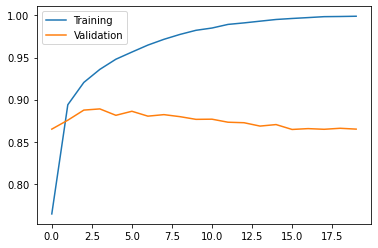

In [124]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(range(E),h.history['accuracy'],label="Training")
plt.plot(range(E),h.history['val_accuracy'],label="Validation")
plt.legend()
plt.show()

In [125]:
loss,acc=model.evaluate(x_test,y_test)
print('Test set accuracy: ',acc*100)

782/782 [==============================] - 2s 2ms/step - loss: 1.0271 - accuracy: 0.8418
Test set accuracy:  84.1759979724884


In [126]:
import numpy as np
p=model.predict(np.expand_dims(x_test[20],axis = 0))
print(class_names[int(p[0]>0.5)])

Positive Review


In [127]:
decode(x_test[20])

' the movie was awesome the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the the 